## Matplotlib & Seaborn

### T0_1_Titanic Survivor Prediction_EDA

### 출처 : https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [28]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [81]:
train_df = pd.read_csv('data/titanic/train.csv')
test_df = pd.read_csv('data/titanic/test.csv')
combine = [train_df, test_df]
combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 5              6         0       3   
 6              7         0       1   
 7              8         0       3   
 8              9         1       3   
 9             10         1       2   
 10            11         1       3   
 11            12         1       1   
 12            13         0       3   
 13            14         0       3   
 14            15         0       3   
 15            16         1       2   
 16            17         0       3   
 17            18         1       2   
 18            19         0       3   
 19            20         1       3   
 20            21         0       2   
 21            22         1       2   
 22            23         1       3   
 23            24         1       1   
 24            25        

## Data 탐색

읽어드린 csv파일에 어떤 column값들이 들어있을까?

In [82]:
print(train_df.columns.values)
train_df.columns.values

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [31]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
train_df.shape

(891, 12)

In [34]:
test_df.shape

(418, 11)

- survived : 생존 유무
- pclass : 객실 등급
- Name : 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- Ticket : 티켓
- fare : 지불한 운임
- Cabin : 방
- Embarked : 항구

- pandas.DataFrame.describe() : NaN 값을 제외하고 데이터 집합의 분포의 중심 경향, 분산 및 모양을 요약하는 통계를 생성(include parameter를 이용해서, 모든 값을 포함시킬 수도 있음)


In [35]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 891명의 승객. 2224명의 실제 탑승자의 40%데이터임
- Survived : 0,1의 값, 38%이 구조됨(killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.)
- Age : 1%이하의 승객들이 65~80세임
- SibSp : 30%정도 sibling / spouse가 함께탐
- Parch : 75%이상의 사람들이 부모나 자식과 함께 타지 않았음
- Fare : 1%이하의 매우 소수의 사람이 비싼 512불의 티켓을 지불하였음

In [36]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mellinger, Miss. Madeleine Violet",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [37]:
original_tr = train_df.tail()
original_tr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [38]:
train_df.info()
print('*'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

- trainset에서 Cabin > Age > Embarked 순서로 null values가 많다.
- testset에서 Cabin > Age 순서로 불완전하다.

- Train : 7개의 변수가 inteter/float type,  
- Test : 6개의 변수가 int/float type, 5개의 변수가 strings(object)

What is the distribution of categorical features?

In [85]:
train_df.describe(include=[np.number]) #column만 찾을 때

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
train_df.describe(include=[np.object]) #카테고리형(범주형) column만 찾을 때

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mellinger, Miss. Madeleine Violet",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [48]:
train_df.describe(include=['O']) 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mellinger, Miss. Madeleine Violet",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


- Only Fare feature seems to have a significative correlation with the survival probability. 하지만 더 찾아봐야한다

- Name : 891개 unique
- Sex : 2개 변수, top = male(남성) 65%임(577/891)
- Ticket : 높은 비율로 중복된 값들이 있음(unique=681)
- Cabin : 중복된 값들이 있음(방을 share한다는 의미도 됨)
- Embarked : 3가지 unique값이 있음. S 항구에서 가장 많이 출발함(top = S)

In [55]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived',ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


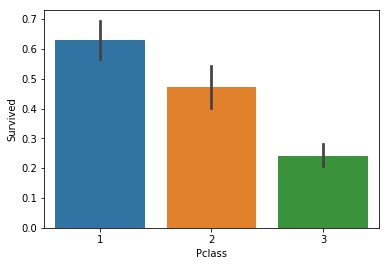

In [62]:
sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.show()

- 성별을 기준으로 생존율을 비교해보세요.

In [88]:
train_df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived',ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


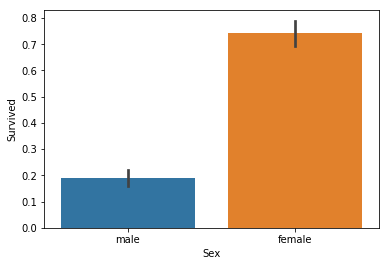

In [89]:
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.show()

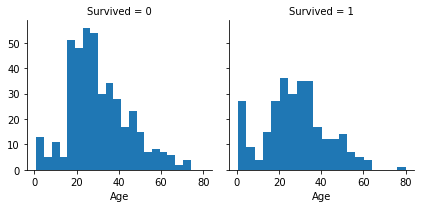

In [90]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)
plt.show()

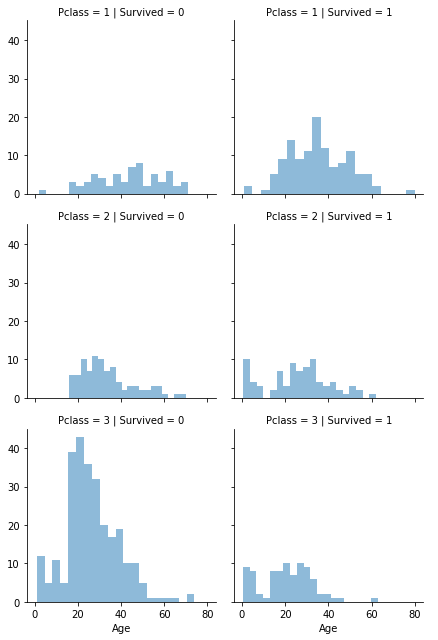

In [91]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show()

C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  re

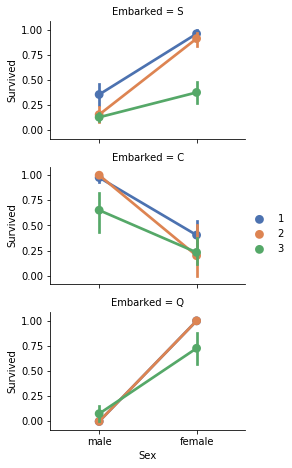

In [94]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Sex','Survived', 'Pclass', palette='deep')
grid.add_legend()
plt.show()

C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


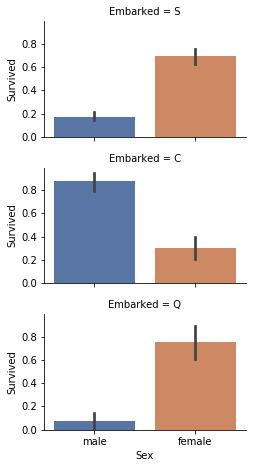

In [107]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Survived', palette='deep')
grid.add_legend()
plt.show()

C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


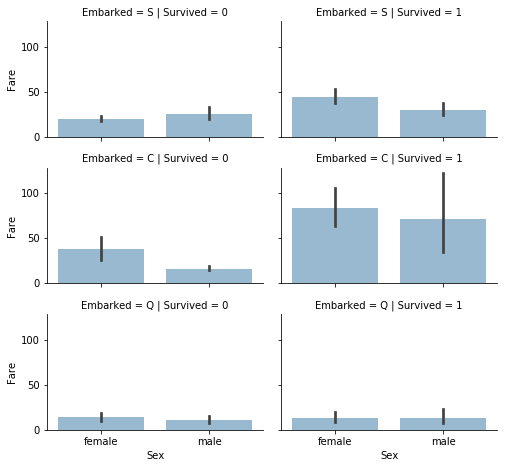

In [108]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5)
grid.add_legend()
plt.show()

C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


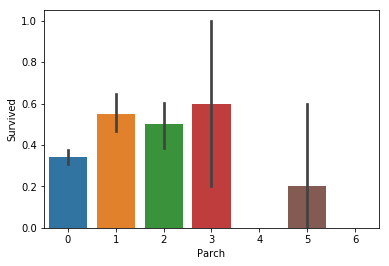

In [109]:
sns.barplot(x="Parch", y="Survived", data=train_df)

C:\Users\user\Anaconda3\envs\lecto-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


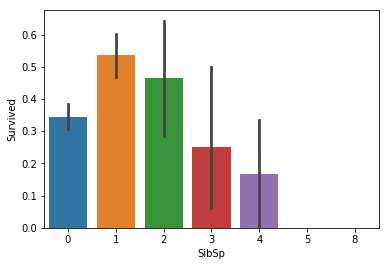

In [110]:
sns.barplot(x="SibSp", y="Survived", data=train_df)

### Logistic Regression 

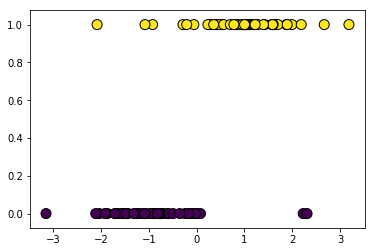

In [8]:
X, y = make_classification(n_features=1, n_redundant=0, n_informative=1, 
                            n_clusters_per_class=1, random_state=50)
plt.scatter(X, y, marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.show()

In [9]:
model = LogisticRegression().fit(X, y)

In [10]:
x = np.linspace(-4, 4, 100)

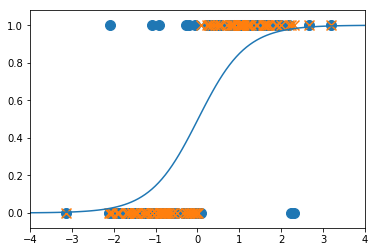

In [12]:
fx = 1.0/(1 + np.exp(-model.coef_[0][0]*x - model.intercept_[0]))
plt.plot(x, fx)
plt.scatter(X, y, marker='o', s=100)
plt.scatter(X, model.predict(X), marker='x', s=100)
plt.xlim(-4, 4)
plt.show()

### Linear SVM

In [54]:
X, y = make_blobs(n_samples=100, centers=2, cluster_std=0.5, random_state=30)
y[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [47]:
print(X[:10])
print(X[:10, 0])
print(X[:10, 1])

[[ 3.15838924 -6.74978581]
 [ 3.11038518 -2.57500451]
 [ 2.91212373 -6.54505819]
 [ 3.06658485 -6.77917462]
 [ 3.01261809 -6.8221684 ]
 [ 2.68936249 -3.3486829 ]
 [ 3.3752125  -5.76028423]
 [ 3.2758345  -2.51429663]
 [ 2.31886533 -6.54476888]
 [ 4.35362854 -7.10461635]]
[3.15838924 3.11038518 2.91212373 3.06658485 3.01261809 2.68936249
 3.3752125  3.2758345  2.31886533 4.35362854]
[-6.74978581 -2.57500451 -6.54505819 -6.77917462 -6.8221684  -3.3486829
 -5.76028423 -2.51429663 -6.54476888 -7.10461635]
[[ 3.11038518 -2.57500451]
 [ 2.68936249 -3.3486829 ]
 [ 3.2758345  -2.51429663]
 [ 2.8978846  -2.61003409]
 [ 2.67778621 -2.91256788]]


In [51]:
print(X[y==0])
print(X[y==0, 0])

[[ 3.11038518 -2.57500451]
 [ 2.68936249 -3.3486829 ]
 [ 3.2758345  -2.51429663]
 [ 2.8978846  -2.61003409]
 [ 2.67778621 -2.91256788]
 [ 3.04444742 -2.8809474 ]
 [ 3.37813196 -2.68241186]
 [ 2.33279882 -3.04285225]
 [ 3.83231137 -2.56245503]
 [ 3.15824902 -1.9078523 ]
 [ 2.87998172 -2.61876969]
 [ 2.67136307 -1.85278916]
 [ 2.09187308 -3.0065873 ]
 [ 1.84092241 -1.91613935]
 [ 3.51688461 -2.52604133]
 [ 3.27425897 -3.28164916]
 [ 3.05460221 -3.67969147]
 [ 3.28812118 -2.90741939]
 [ 3.43960678 -3.34561507]
 [ 2.50084681 -2.77262446]
 [ 2.95001902 -2.93845794]
 [ 3.33943374 -3.07890288]
 [ 2.98568729 -2.6150433 ]
 [ 3.5747943  -2.00483766]
 [ 2.83252236 -2.23313361]
 [ 3.37537965 -3.23526284]
 [ 2.01988951 -1.59248252]
 [ 2.683937   -1.87546651]
 [ 2.74004796 -2.11584647]
 [ 2.53825603 -2.81140864]
 [ 2.53216951 -1.96048628]
 [ 2.79616423 -2.49335763]
 [ 2.35421465 -3.02708882]
 [ 3.32235137 -3.13249821]
 [ 3.50379847 -1.53115677]
 [ 3.17041958 -2.63425356]
 [ 3.38415087 -2.90691248]
 

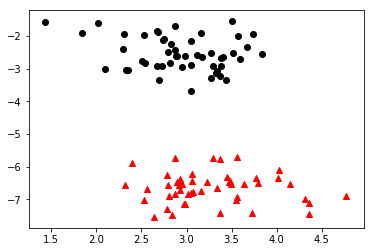

In [49]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='k', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='r', marker='^')
plt.show()

In [56]:
model = SVC(kernel='linear', C=1e10).fit(X, y)

- n_support_ : 각 클래스의 서포트의 개수
- support_vectors_ : 각 클래스의 서포트의 x 값
- coef_:  weight
- intercept_:  bias 

In [16]:
model.n_support_

array([1, 2])

In [17]:
model.support_vectors_

array([[ 3.05460221, -3.67969147],
       [ 3.55843523, -5.68977917],
       [ 2.86846825, -5.74247281]])

In [74]:
xmin = X[:,0].min()
xmax = X[:,0].max()
ymin = X[:,1].min()
ymax = X[:,1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

In [75]:
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]

In [20]:
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']

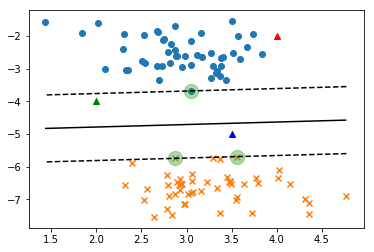

In [21]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='x')
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], 
            model.support_vectors_[:, 1], 
            s=200, alpha=0.4)

x_new = [[4, -2], [3.5, -5], [2, -4]]
plt.scatter(x_new[0][0], x_new[0][1], marker='^', c='r')
plt.scatter(x_new[1][0], x_new[1][1], marker='^', c='b')
plt.scatter(x_new[2][0], x_new[2][1], marker='^', c='g')

plt.show()

In [22]:
model.predict([x_new[0]])

array([0])

In [23]:
model.predict([x_new[1]])

array([1])

In [24]:
model.predict([x_new[2]])

array([0])